In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [3]:
def LoadData(negFilePath, posFilePath):
    negFileContent = pd.read_csv(negFilePath)
    posFileContent = pd.read_csv(posFilePath)
    df = negFileContent.append(posFileContent)
    df = shuffle(df)
    del negFileContent
    del posFileContent
    return df

In [4]:
def SplitData(df):
    # get features and labels
    featuresColumns = df.columns[0:len(df.columns) - 1]
    lablesColumn = df.columns[len(df.columns) - 1]
    trainingFeaturesX = df.loc[:, featuresColumns]
    trainingLabely = df.loc[:, lablesColumn]
    # split the data into training and test
    traningFeatures, testFeatures, trainingLabels, actualResults = train_test_split(trainingFeaturesX, trainingLabely,test_size=0.33, random_state=42)
    return traningFeatures, testFeatures, trainingLabels, actualResults

In [5]:
def classify(X_train, Y_train, X_test, Y_test):
    classifier = LogisticRegression()
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    cm = confusion_matrix(Y_test, Y_pred)                
    print "Logistic Regression"
    print cm
        
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    labels= ['break signal', 'no break signal']
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Load data of 1 subject (VPae) from 2; positive and negative files, into 1 dataframe

In [6]:
df = LoadData("csv/negVPae.csv", "csv/posVPae.csv")

Removing columns that were not used in the paper (https://www.frontiersin.org/articles/10.3389/fninf.2018.00029/full?fbclid=IwAR3kXD7YAUnxuhdfnd1hHKIdI6IFY5__7vKqVjZFhwARO7me_-nRVC_Rbkc_) leaving only 7 electrodes which are : F3, F4, C3, Cz, C4, P3, P4 Note: In our headset we only have F3 and F4 electrodes

In [7]:
df.drop(df.columns[0:1800], axis=1, inplace=True)
df.drop(df.columns[300:1200], axis=1, inplace=True)
df.drop(df.columns[600:4500], axis=1, inplace=True)
df.drop(df.columns[900:1200], axis=1, inplace=True)
df.drop(df.columns[1200:1500], axis=1, inplace=True)
df.drop(df.columns[1500:5700], axis=1, inplace=True)
df.drop(df.columns[1800:2700], axis=1, inplace=True)
df.drop(df.columns[2100:len(df.columns) - 1], axis=1, inplace=True)

In [8]:
traningFeatures, testFeatures, trainingLabels, actualResults = SplitData(df)

Logistic Regression
[[  40   39]
 [ 165 1412]]


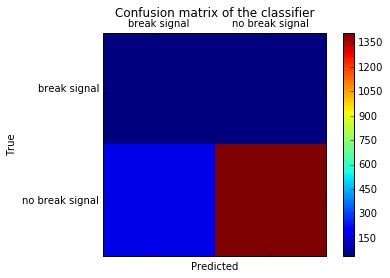

In [9]:
dictModels = classify(traningFeatures, trainingLabels, testFeatures, actualResults)

# After standardizing the data in the cells below then applying PCA the result is worse, The classifier classified all instances as no brake (normal events) and totally neglected breaking events

In [10]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(traningFeatures)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(traningFeatures)
test_img = scaler.transform(testFeatures)

In [11]:
pca = PCA(.95)
pca.fit(train_img)
PCA_training_features = pca.transform(train_img)
PCA_testing_features = pca.transform(test_img)

Logistic Regression
[[   0   79]
 [   0 1577]]


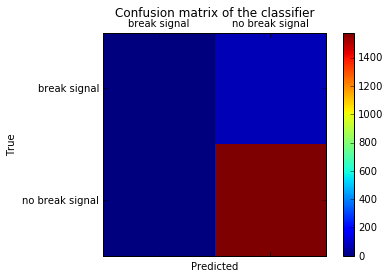

In [12]:
dictModels2 = classify(PCA_training_features, trainingLabels, PCA_testing_features, actualResults)

Under sampling unsuccessful trials. I guess we need to do this on the original data

In [20]:
# Class count
count_class_0, count_class_1 = trainingLabels.value_counts()

# Divide by class
df_class_0 = traningFeatures[trainingLabels == 'normal']
df_class_1 = traningFeatures[trainingLabels == 'brake']

In [21]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

In [24]:
print df_test_under.shape

(246, 2100)


In [26]:
traningFeatures[trainingLabels == 'normal'].shape


(3238, 2100)

In [27]:
traningFeatures[trainingLabels == 'brake'].shape

(123, 2100)